In [76]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 


In [77]:
diabetes_df = pd.read_csv ("C:\\MULTIPLEDISEASEPREDICTION\\data\\diabetes.csv")
heart_df = pd.read_csv ("C:\\MULTIPLEDISEASEPREDICTION\\data\\heart.csv")

In [78]:
diabetes_df.head()
diabetes_df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [79]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [80]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [81]:
diabetes_df.shape

(100000, 9)

In [82]:
diabetes_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [83]:
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [84]:
diabetes_df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [85]:
diabetes_df['gender']= diabetes_df['gender'].replace({'Other':'Female'})

In [86]:
diabetes_df[diabetes_df['gender']=='Other']
diabetes_df['gender'].value_counts()

gender
Female    58570
Male      41430
Name: count, dtype: int64

In [87]:
diabetes_df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [88]:
diabetes_df['smoking_history'] = diabetes_df['smoking_history'].replace({
    'current': 'current',
    'former': 'past',
    'not current': 'past',
    'ever': 'past',
    'never': 'never',
    'No Info': 'unknown'
})


In [89]:
diabetes_df['smoking_history'].value_counts()


smoking_history
unknown    35816
never      35095
past       19803
current     9286
Name: count, dtype: int64

In [90]:
diabetes_df['heart_disease'].value_counts()

heart_disease
0    96058
1     3942
Name: count, dtype: int64

In [91]:
diabetes_df['hypertension'].value_counts()

hypertension
0    92515
1     7485
Name: count, dtype: int64

In [92]:
diabetes_df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [93]:
diabetes_df.duplicated().sum()

np.int64(4036)

In [94]:
diabetes_df[diabetes_df.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,unknown,27.32,6.6,159,0
3272,Female,80.0,0,0,unknown,27.32,3.5,80,0
3418,Female,19.0,0,0,unknown,27.32,6.5,100,0
3939,Female,78.0,1,0,past,27.32,3.5,130,0
3960,Male,47.0,0,0,unknown,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,unknown,27.32,5.8,145,0
99989,Female,26.0,0,0,unknown,27.32,5.0,158,0
99990,Male,39.0,0,0,unknown,27.32,6.1,100,0


In [95]:
diabetes_df = diabetes_df.drop_duplicates()

In [104]:
print(type(diabetes_df))
diabetes_df.shape


<class 'pandas.core.frame.DataFrame'>


(95964, 9)

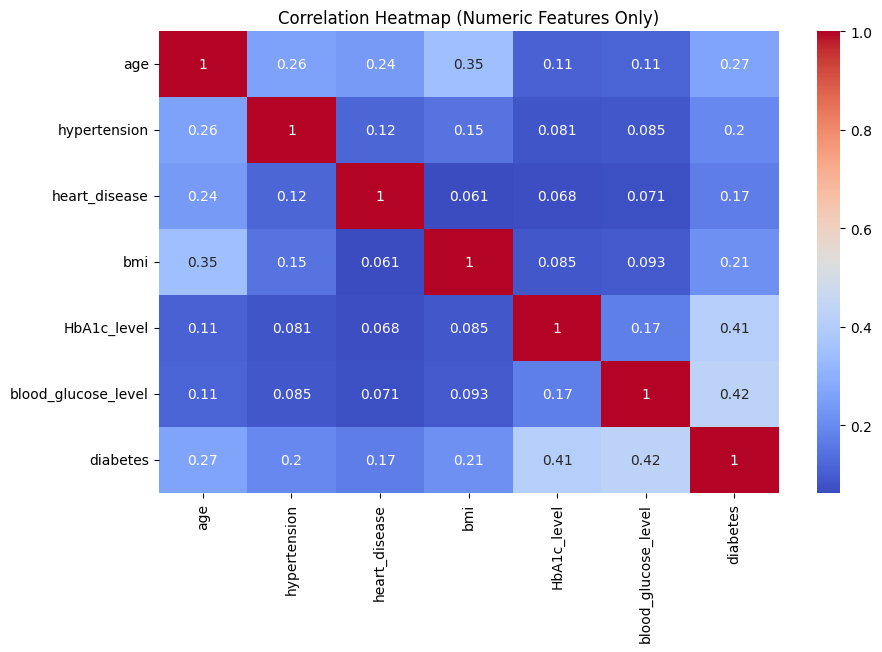

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = diabetes_df.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

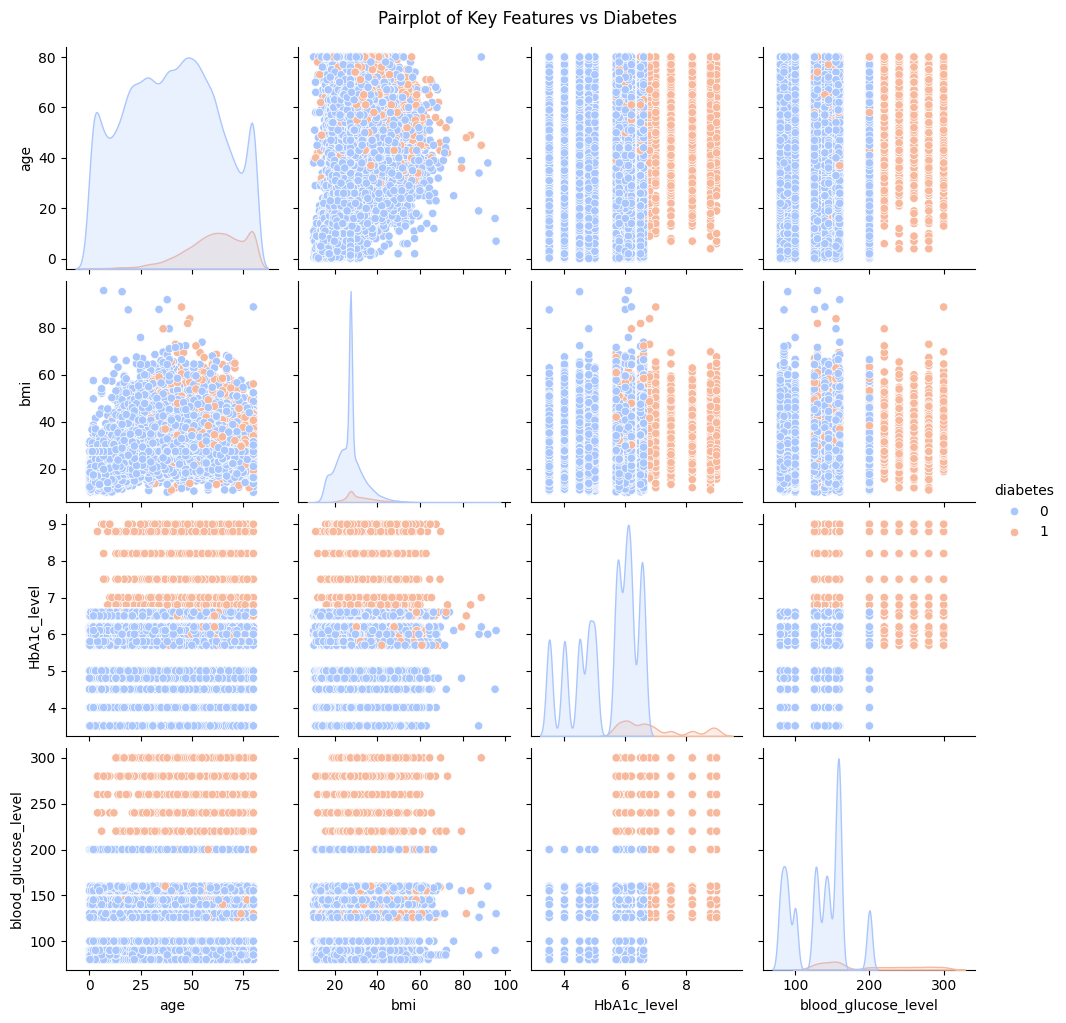

In [98]:
# Subset of features you want to visualize
pairplot_df = diabetes_df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']]
sns.pairplot(pairplot_df, hue='diabetes', palette='coolwarm', diag_kind='kde')
plt.suptitle("Pairplot of Key Features vs Diabetes", y=1.02)
plt.show()


In [99]:
# Check correlation between features
correlation_matrix = numeric_df.corr()

# See just the correlation between HbA1c and Glucose
print("Correlation:", correlation_matrix['HbA1c_level']['blood_glucose_level'])


Correlation: 0.17182752728552028


In [100]:
correlation_matrix = numeric_df.corr()
correlation_matrix 

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.257738,0.238799,0.345159,0.107174,0.114563,0.265496
hypertension,0.257738,1.000000,0.119989,0.148150,0.081494,0.084915,0.195666
heart_disease,0.238799,0.119989,1.000000,0.061393,0.068201,0.070935,0.170703
bmi,0.345159,0.148150,0.061393,1.000000,0.084502,0.092609,0.214963
HbA1c_level,0.107174,0.081494,0.068201,0.084502,1.000000,0.171828,0.406590
blood_glucose_level,0.114563,0.084915,0.070935,0.092609,0.171828,1.000000,0.424541
diabetes,0.265496,0.195666,0.170703,0.214963,0.406590,0.424541,1.000000


In [101]:
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,unknown,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [102]:
diabetes_df[diabetes_df['bmi']==1]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


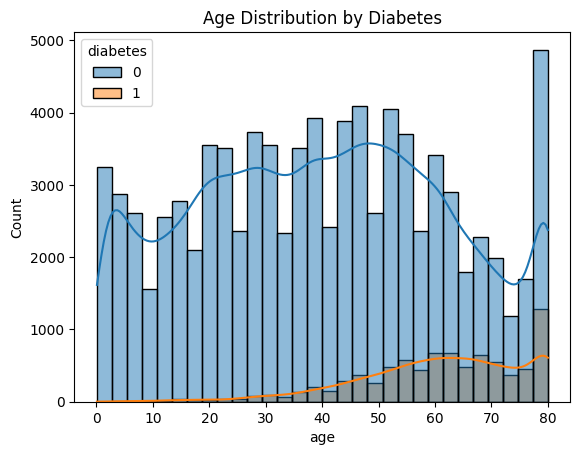

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=diabetes_df, x='age', hue='diabetes', kde=True, bins=30)
plt.title("Age Distribution by Diabetes")
plt.show()


In [105]:
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,unknown,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,unknown,24.60,4.8,145,0
99996,Female,2.0,0,0,unknown,17.37,6.5,100,0
99997,Male,66.0,0,0,past,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [106]:
diabetes_df['bmi'] = diabetes_df['bmi'].clip(10, 50)
diabetes_df['blood_glucose_level'] = diabetes_df['blood_glucose_level'].clip(70, 250)
diabetes_df['HbA1c_level'] = diabetes_df['HbA1c_level'].clip(3.5, 9)


In [107]:
diabetes_df[['bmi', 'blood_glucose_level', 'HbA1c_level']].describe()


,bmi,blood_glucose_level,HbA1c_level
count,95964.000000,95964.000000,95964.000000
mean,27.276431,137.579759,5.533095
std,6.580158,38.798364,1.073240
min,10.010000,80.000000,3.500000
25%,23.390000,100.000000,4.800000
50%,27.320000,140.000000,5.800000
75%,29.870000,159.000000,6.200000
max,50.000000,250.000000,9.000000


In [109]:
features_to_check = ['bmi', 'blood_glucose_level', 'HbA1c_level']

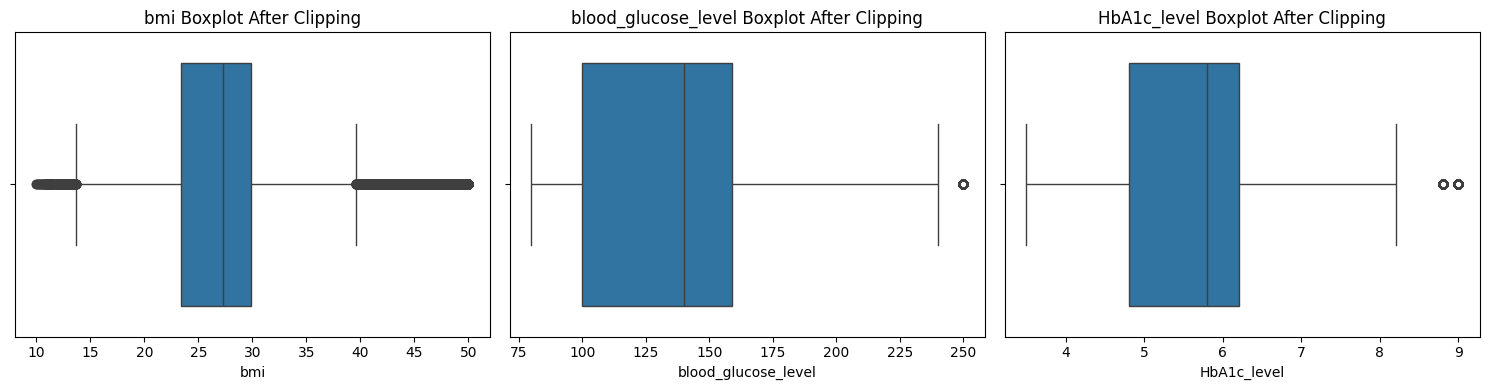

In [110]:
plt.figure(figsize=(15, 4))
for i, col in enumerate(features_to_check):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=diabetes_df[col])
    plt.title(f"{col} Boxplot After Clipping")
plt.tight_layout()
plt.show()


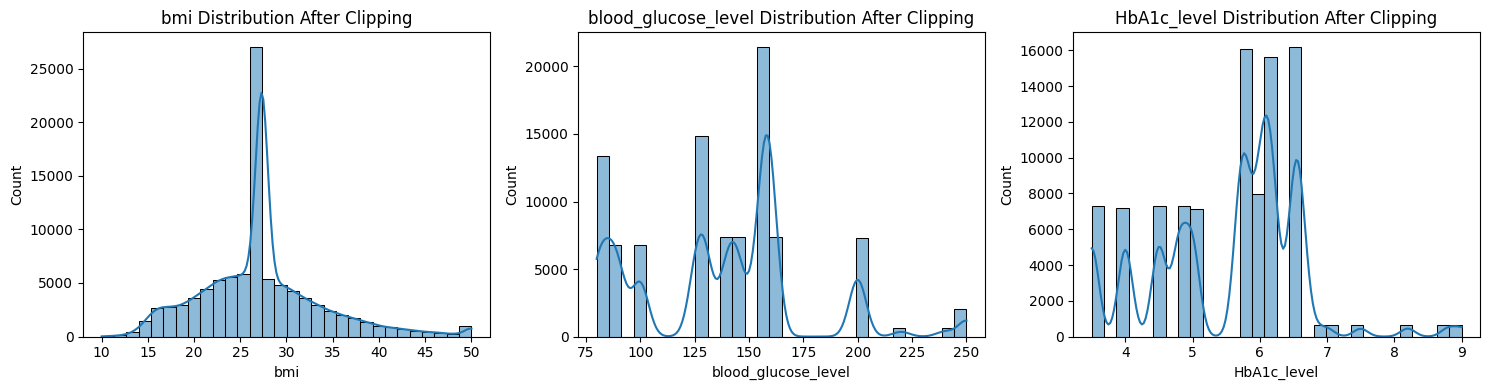

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_check = ['bmi', 'blood_glucose_level', 'HbA1c_level']

plt.figure(figsize=(15, 4))
for i, col in enumerate(features_to_check):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=diabetes_df, x=col, kde=True, bins=30)
    plt.title(f"{col} Distribution After Clipping")
plt.tight_layout()
plt.show()


In [117]:
diabetes_df['age_group'] = pd.cut(diabetes_df['age'], bins=[0,18,40,60,100], labels=['child','young','adult','senior'])
diabetes_df['age_group'] = diabetes_df['age_group'].astype(str)


In [118]:
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,0,senior
1,Female,54.0,0,0,unknown,27.32,6.6,80,0,adult
2,Male,28.0,0,0,never,27.32,5.7,158,0,young
3,Female,36.0,0,0,current,23.45,5.0,155,0,young
4,Male,76.0,1,1,current,20.14,4.8,155,0,senior


In [119]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95964 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               95964 non-null  object 
 1   age                  95964 non-null  float64
 2   hypertension         95964 non-null  int64  
 3   heart_disease        95964 non-null  int64  
 4   smoking_history      95964 non-null  object 
 5   bmi                  95964 non-null  float64
 6   HbA1c_level          95964 non-null  float64
 7   blood_glucose_level  95964 non-null  int64  
 8   diabetes             95964 non-null  int64  
 9   age_group            95964 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 8.1+ MB


In [120]:
diabetes_df['glucose_hba1c'] = diabetes_df['blood_glucose_level'] * diabetes_df['HbA1c_level']


In [121]:
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group,glucose_hba1c
0,Female,80.0,0,1,never,25.19,6.6,140,0,senior,924.0
1,Female,54.0,0,0,unknown,27.32,6.6,80,0,adult,528.0
2,Male,28.0,0,0,never,27.32,5.7,158,0,young,900.6
3,Female,36.0,0,0,current,23.45,5.0,155,0,young,775.0
4,Male,76.0,1,1,current,20.14,4.8,155,0,senior,744.0


In [122]:
diabetes_df.shape

(95964, 11)